In [2]:
import pandas as pd


In [12]:
!pip install yfinance

     -------------------------------------- 123.4/123.4 kB 7.5 MB/s eta 0:00:00
     ------------------------------------- 176.8/176.8 kB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 3.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 159.4/159.4 kB 9.9 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=3a3b6c0d4f322fbd8f6824a736c23e3d20b204c9f4ee405b2abd178ac4abaf22
  Stored 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [22]:
url = "https://docs.google.com/spreadsheets/d/1BV0koOEqQs580tEPGv9bpZYUfY8q8UTfZGTcEoK_VtQ/export?format=csv"
df = pd.read_csv(url)



C:\Users\artkl\AppData\Local\Temp\ipykernel_23684\3088069440.py:2: DtypeWarning: Columns (9,14,15,17,51,53,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [20]:
gids =["1952168269","1020209628","887547605", "1168409358", "1058701335", "917968550", "701342270", "1186064842"]
spreadsheet_id = "1BV0koOEqQs580tEPGv9bpZYUfY8q8UTfZGTcEoK_VtQ"
temp = {"IMF_data_df":"",
        "urban_population_df":"",
        "income_group_df":"",
        "life_expectancy_df":"",
        "gini_index_df":"",
        "poverty_rate_df":"",
        "birth_rate_df":"",
        "health_expenditure_df":""
        }

for gid, t in zip(gids, temp):
    
    temp[t]=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={gid}")



C:\Users\artkl\AppData\Local\Temp\ipykernel_23684\1849813509.py:15: DtypeWarning: Columns (9,14,15,17,51,53,59) have mixed types. Specify dtype option on import or set low_memory=False.
  temp[t]=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv&gid={gid}")


In [23]:
temp["health_expenditure_df"].head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.971391,6.067786,5.929017,5.789155,5.812676,6.035806,6.044468,5.72792,NaN,NaN


In [33]:
#converting imf dataframe
# SELECTING COLUMNS TO KEEP AND TO MELT
columns_to_keep = ["COUNTRY", "INDICATOR", "UNIT"]
columns_to_melt = ["1980","1981","1982","1983","1984","1985","1986","1987", "1988", "1989", "1990","1991","1992", "1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023","2024","2025","2026","2027","2028","2029","2030" ]
# melting
melted_IMF_df = pd.melt(temp["IMF_data_df"], id_vars=columns_to_keep, value_vars = columns_to_melt, var_name="YEAR", value_name="VALUE")
melted_IMF_df
# selecting indicators and countries

df_countries = melted_IMF_df[melted_IMF_df['COUNTRY'].isin(['Germany', 'Denmark', 'Poland','United States','Chile','Costa Rica','Japan','South Africa', 'Ghana','Ivory Coast'])] 

df_countries

# Select specific indicators: GDP per capita, Unemployment, Consumer Price Index (Inflation), Savings, Investment  

df_countries_analysis = df_countries[df_countries['INDICATOR'].isin(['Gross domestic product (GDP) per capita, current prices, U.S. dollars','Gross national savings, Percent of GDP','All Items, Consumer price index (CPI), End-of-period (EoP)','Unemployment rate'])]

df_countries_analysis


,COUNTRY,INDICATOR,UNIT,YEAR,VALUE
152,United States,"Gross national savings, Percent of GDP",Percent,1980,22.059
156,United States,Unemployment rate,NaN,1980,7.175
237,United States,"All Items, Consumer price index (CPI), End-of-...",Index,1980,86.750
273,Germany,Unemployment rate,NaN,1980,3.359
340,Germany,"All Items, Consumer price index (CPI), End-of-...",Index,1980,NaN
...,...,...,...,...,...
412147,Costa Rica,"All Items, Consumer price index (CPI), End-of-...",Index,2030,127.866
412150,Chile,"All Items, Consumer price index (CPI), End-of-...",Index,2030,168.518
412165,Chile,"Gross national savings, Percent of GDP",Percent,2030,22.257
415384,Ghana,"All Items, Consumer price index (CPI), End-of-...",Index,2030,1177.280


In [36]:
indicator_map = {
    'Gross domestic product (GDP) per capita, current prices, U.S. dollars': 'GDP per capita (adjusted for purchasing power parity)',
    'Gross national savings, Percent of GDP': 'National savings (% GDP)',
    'All Items, Consumer price index (CPI), End-of-period (EoP)': 'Inflation (CPI, %))',
    'Unemployment rate': 'Unemployment levels (%)'
}

df_countries_analysis['INDICATOR'] = df_countries_analysis['INDICATOR'].map(indicator_map)

df_countries_analysis.sort_values("INDICATOR")
df_countries_analysis

C:\Users\artkl\AppData\Local\Temp\ipykernel_23684\3679453701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_analysis['INDICATOR'] = df_countries_analysis['INDICATOR'].map(indicator_map)


,COUNTRY,INDICATOR,UNIT,YEAR,VALUE
152,United States,NaN,Percent,1980,22.059
156,United States,NaN,NaN,1980,7.175
237,United States,NaN,Index,1980,86.750
273,Germany,NaN,NaN,1980,3.359
340,Germany,NaN,Index,1980,NaN
...,...,...,...,...,...
412147,Costa Rica,NaN,Index,2030,127.866
412150,Chile,NaN,Index,2030,168.518
412165,Chile,NaN,Percent,2030,22.257
415384,Ghana,NaN,Index,2030,1177.280


In [37]:
df_countries_analysis.isnull("INDICATOR").sum()

TypeError: DataFrame.isnull() takes 1 positional argument but 2 were given

In [8]:
df_up.head()

,DATASET,SERIES_CODE,OBS_MEASURE,COUNTRY,INDICATOR,FREQUENCY,SCALE,DECIMALS_DISPLAYED,FUNCTIONAL_CAT,INT_ACC_ITEM,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,IMF.RES:WEO(9.0.0),LIE.LE.A,OBS_VALUE,"Liechtenstein, Principality of","Employed persons, Persons for countries / Inde...",Annual,Millions,Three,NaN,NaN,...,0.041,0.043,0.043,0.044,0.045,0.046,NaN,NaN,NaN,NaN
1,IMF.RES:WEO(9.0.0),CAN.LE.A,OBS_VALUE,Canada,"Employed persons, Persons for countries / Inde...",Annual,Millions,Three,NaN,NaN,...,18.973,19.748,20.341,20.723,21.009,21.080,NaN,NaN,NaN,NaN
2,IMF.RES:WEO(9.0.0),HND.NGDPPC.A,OBS_VALUE,Honduras,"Gross domestic product (GDP), Current prices, ...",Annual,Units,Three,NaN,NaN,...,66813.898,74749.009,80686.569,86300.122,95066.366,100495.041,106338.384,112815.742,119722.508,126957.554
3,IMF.RES:WEO(9.0.0),HND.LP.A,OBS_VALUE,Honduras,"Population, Persons for countries / Index for ...",Annual,Millions,Three,NaN,NaN,...,10.117,10.294,10.475,10.659,10.846,11.037,11.231,11.428,11.629,11.833
4,IMF.RES:WEO(9.0.0),BHS.LP.A,OBS_VALUE,"Bahamas, The","Population, Persons for countries / Index for ...",Annual,Millions,Three,NaN,NaN,...,0.394,0.399,0.404,0.408,0.413,0.417,0.421,0.425,0.429,0.434


In [4]:
df.head()

,DATASET,SERIES_CODE,OBS_MEASURE,COUNTRY,INDICATOR,FREQUENCY,SCALE,DECIMALS_DISPLAYED,FUNCTIONAL_CAT,INT_ACC_ITEM,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,IMF.RES:WEO(9.0.0),LIE.LE.A,OBS_VALUE,"Liechtenstein, Principality of","Employed persons, Persons for countries / Inde...",Annual,Millions,Three,NaN,NaN,...,0.041,0.043,0.043,0.044,0.045,0.046,NaN,NaN,NaN,NaN
1,IMF.RES:WEO(9.0.0),CAN.LE.A,OBS_VALUE,Canada,"Employed persons, Persons for countries / Inde...",Annual,Millions,Three,NaN,NaN,...,18.973,19.748,20.341,20.723,21.009,21.080,NaN,NaN,NaN,NaN
2,IMF.RES:WEO(9.0.0),HND.NGDPPC.A,OBS_VALUE,Honduras,"Gross domestic product (GDP), Current prices, ...",Annual,Units,Three,NaN,NaN,...,66813.898,74749.009,80686.569,86300.122,95066.366,100495.041,106338.384,112815.742,119722.508,126957.554
3,IMF.RES:WEO(9.0.0),HND.LP.A,OBS_VALUE,Honduras,"Population, Persons for countries / Index for ...",Annual,Millions,Three,NaN,NaN,...,10.117,10.294,10.475,10.659,10.846,11.037,11.231,11.428,11.629,11.833
4,IMF.RES:WEO(9.0.0),BHS.LP.A,OBS_VALUE,"Bahamas, The","Population, Persons for countries / Index for ...",Annual,Millions,Three,NaN,NaN,...,0.394,0.399,0.404,0.408,0.413,0.417,0.421,0.425,0.429,0.434


In [14]:
df_filtered = df[["SERIES_CODE", "COUNTRY", "INDICATOR", "FREQUENCY", "SCALE", "PRICES", "UNIT", "TOPIC", "1980","1981","1982","1983","1984","1985","1986","1987", "1988", "1989", "1990","1991","1992", "1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023","2024","2025","2026","2027","2028","2029","2030" ]]
df_filtered.head()

,SERIES_CODE,COUNTRY,INDICATOR,FREQUENCY,SCALE,PRICES,UNIT,TOPIC,1980,1981,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,LIE.LE.A,"Liechtenstein, Principality of","Employed persons, Persons for countries / Inde...",Annual,Millions,NaN,NaN,Employment,NaN,NaN,...,0.041,0.043,0.043,0.044,0.045,0.046,NaN,NaN,NaN,NaN
1,CAN.LE.A,Canada,"Employed persons, Persons for countries / Inde...",Annual,Millions,NaN,NaN,Employment,10.980,11.304,...,18.973,19.748,20.341,20.723,21.009,21.080,NaN,NaN,NaN,NaN
2,HND.NGDPPC.A,Honduras,"Gross domestic product (GDP), Current prices, ...",Annual,Units,Current prices,Domestic currency,Gross domestic product (GDP),2160.861,2133.804,...,66813.898,74749.009,80686.569,86300.122,95066.366,100495.041,106338.384,112815.742,119722.508,126957.554
3,HND.LP.A,Honduras,"Population, Persons for countries / Index for ...",Annual,Millions,NaN,NaN,Population,3.673,3.790,...,10.117,10.294,10.475,10.659,10.846,11.037,11.231,11.428,11.629,11.833
4,BHS.LP.A,"Bahamas, The","Population, Persons for countries / Index for ...",Annual,Millions,NaN,NaN,Population,0.211,0.215,...,0.394,0.399,0.404,0.408,0.413,0.417,0.421,0.425,0.429,0.434


In [21]:
# Print first 100 unique values
unique_values = df_filtered["INDICATOR"].unique()
print(unique_values[:100])  # First 100

# Print last 100
print(unique_values[-100:])  # Last 100

['Employed persons, Persons for countries / Index for country groups'
 'Gross domestic product (GDP), Current prices, Per capita, Domestic currency'
 'Population, Persons for countries / Index for country groups'
 'Gross domestic product (GDP), Constant prices, Domestic currency'
 'Current account balance (credit less debit), Percent of GDP'
 'Financial account balance (assets less liabilities), US dollar'
 'Net lending (+) / net borrowing (-), General government, Percent of GDP'
 'Gross domestic product (GDP), Price deflator, Index'
 'Expenditure, General government, Percent of GDP'
 'Net debt, General government, Domestic currency'
 'Revenue, General government, Percent of GDP'
 'Gross domestic product (GDP), Per capita, purchasing power parity (PPP) international dollar, ICP benchmarks 2017-2021'
 'Current account balance (credit less debit), US dollar'
 'Expenditure, General government, Domestic currency'
 'Gross domestic product (GDP), Constant prices, Per capita, Domestic currenc

,SERIES_CODE,COUNTRY,INDICATOR,FREQUENCY,SCALE,PRICES,UNIT,TOPIC,1980,1981,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030


In [22]:
# Print first 100 unique values
unique_topics = df_filtered["TOPIC"].unique()
print(unique_topics[:100])  # First 100

# Print last 100
print(unique_topics[-100:])  # Last 100

['Employment' 'Gross domestic product (GDP)' 'Population'
 'Balance of payments; Current account'
 'Balance of payments; Financial account' 'Fiscal sector'
 'Commodity prices' 'Consumer prices' 'Imports' 'Exports'
 'Trade in goods; Trade in services' 'Trade in goods' 'Exchange rates'
 'Unemployment' 'External debt']
['Employment' 'Gross domestic product (GDP)' 'Population'
 'Balance of payments; Current account'
 'Balance of payments; Financial account' 'Fiscal sector'
 'Commodity prices' 'Consumer prices' 'Imports' 'Exports'
 'Trade in goods; Trade in services' 'Trade in goods' 'Exchange rates'
 'Unemployment' 'External debt']


In [34]:
germany_gdp=df_filtered[(df_filtered["INDICATOR"]=="Gross domestic product (GDP), Current prices, Domestic currency") & (df_filtered["COUNTRY"]=="Germany")] 

In [38]:
year_cols = [col for col in germany_gdp.columns if str(col).isdigit() and len(str(col)) == 4]

# Melt the dataframe to have years as a single column
germany_gdp_melted = germany_gdp.melt(
    id_vars=['COUNTRY', 'INDICATOR'], 
    value_vars=year_cols,
    var_name='YEAR',
    value_name='VALUE'
)

# Convert YEAR to numeric for proper plotting
germany_gdp_melted['YEAR'] = pd.to_numeric(germany_gdp_melted['YEAR'])

# Sort by year
germany_gdp_melted = germany_gdp_melted.sort_values('YEAR')

In [41]:
germany_gdp_melted

,COUNTRY,INDICATOR,YEAR,VALUE
0,Germany,"Gross domestic product (GDP), Current prices, ...",1980,795.079
1,Germany,"Gross domestic product (GDP), Current prices, ...",1981,829.927
2,Germany,"Gross domestic product (GDP), Current prices, ...",1982,862.701
3,Germany,"Gross domestic product (GDP), Current prices, ...",1983,904.602
4,Germany,"Gross domestic product (GDP), Current prices, ...",1984,948.992
5,Germany,"Gross domestic product (GDP), Current prices, ...",1985,990.789
6,Germany,"Gross domestic product (GDP), Current prices, ...",1986,1047.729
7,Germany,"Gross domestic product (GDP), Current prices, ...",1987,1082.058
8,Germany,"Gross domestic product (GDP), Current prices, ...",1988,1139.309
9,Germany,"Gross domestic product (GDP), Current prices, ...",1989,1211.702


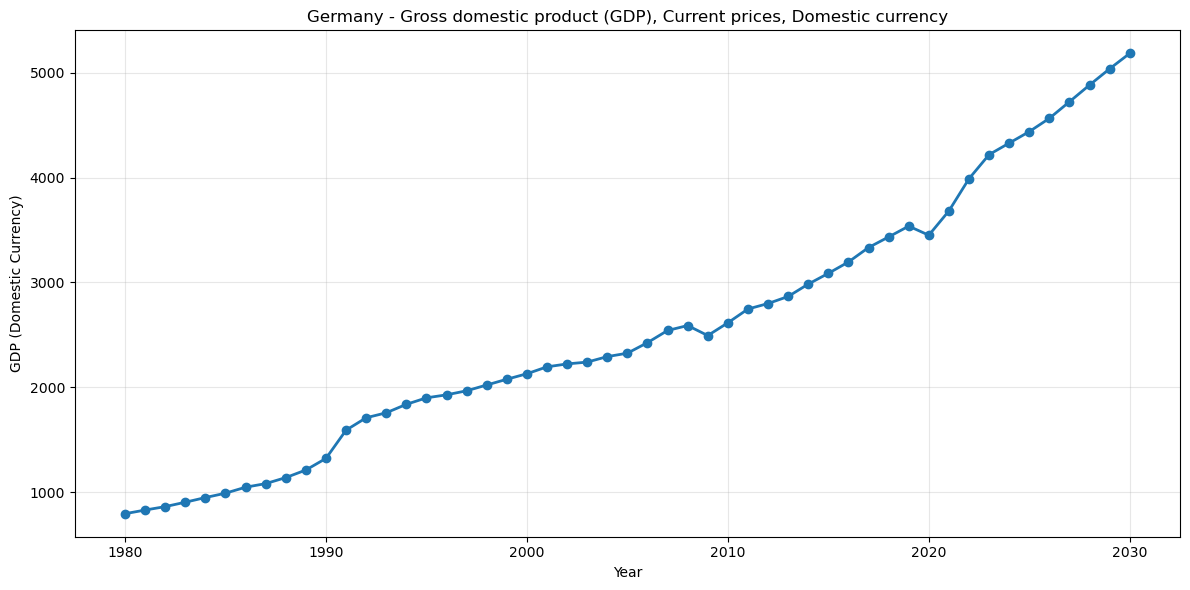

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(germany_gdp_melted['YEAR'], germany_gdp_melted['VALUE'], 
         marker='o', linewidth=2, markersize=6)
plt.title(f"{germany_gdp_melted['COUNTRY'].iloc[0]} - {germany_gdp_melted['INDICATOR'].iloc[0]}")
plt.xlabel('Year')
plt.ylabel('GDP (Domestic Currency)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# FUNCTION CRETAING PLOTS BASED ON COUNTRY AND TYPE OF INDICATOR

def plot_series(df, country, indicator):
    """Plot time series for a specific country and indicator."""
    # Filter and prepare data
    data = df[(df["INDICATOR"]==indicator) & (df["COUNTRY"]==country)]
    years = [c for c in data.columns if str(c).isdigit() and len(str(c))==4]
    melted = data.melt(id_vars=['COUNTRY', 'INDICATOR'], value_vars=years, var_name='YEAR', value_name='VALUE')
    melted['YEAR'] = pd.to_numeric(melted['YEAR'])
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(melted.sort_values('YEAR')['YEAR'], melted.sort_values('YEAR')['VALUE'], marker='o', linewidth=2)
    plt.title(f"{country} - {indicator}")
    plt.xlabel('Year'); plt.ylabel('Value'); plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return melted.sort_values('YEAR')

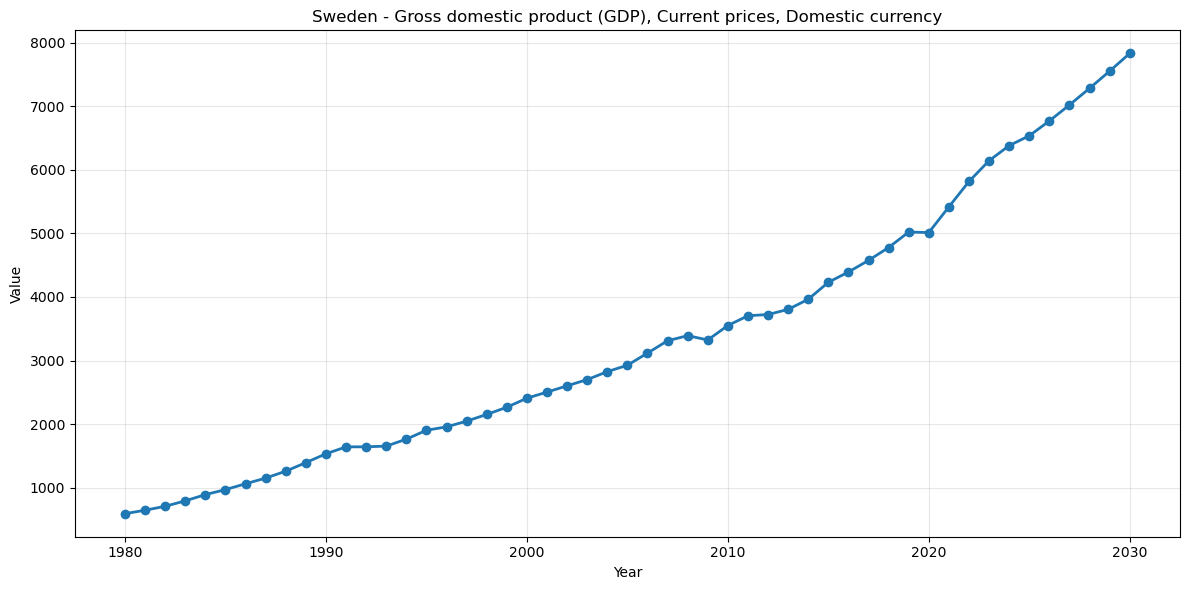

In [44]:
sweden_data = plot_series(df_filtered, "Sweden", 
                          "Gross domestic product (GDP), Current prices, Domestic currency")